# Sentiment Analysis

## Using Vader-Lexicon

In [1]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     e:\rohit\python\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [3]:
example = 'It was lovely!'
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'compound': 0.6239}

## Using Dataset

+ Dataset consist of two columns - Review Sentence & Corresponding Sentiment

### Importing the libraries

In [4]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 7

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package stopwords to
[nltk_data]     e:\rohit\python\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Importing the dataset

In [5]:
df = pd.read_csv('Dataset.tsv', delimiter='\t', quoting=3)
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


### Preprocessing

+ Stemming Process refers to normalizing words into its root form.
+ It has one drawback though that sometimes root word doesn't mean anything (intelligence, intelligent => intelligen).

In [6]:
corpus = []
for i in range(0, df.shape[0]):
    # Ignoring punctuations & numbers & converting into lowercase & finally splitting into words
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i]).lower().split()
    
    # Instantiating PorterStemmer
    ps = PorterStemmer()
    
#     review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
#     --------------------------------------OR-------------------------------------------------

    for i in range(0, len(review)):
        # Ignoring stop words
        if review[i] not in set(stopwords.words('english')):
            # stemming (eg. converts loved to love)
            review[i] = ps.stem(review[i])
    
    corpus.append(' '.join(review))

In [7]:
# collection of pre-processed sentences
corpus

['wow love this place',
 'crust is not good',
 'not tasti and the textur was just nasti',
 'stop by during the late may bank holiday off rick steve recommend and love it',
 'the select on the menu was great and so were the price',
 'now i am get angri and i want my damn pho',
 'honeslti it didn t tast that fresh',
 'the potato were like rubber and you could tell they had been made up ahead of time being kept under a warmer',
 'the fri were great too',
 'a great touch',
 'servic was very prompt',
 'would not go back',
 'the cashier had no care what so ever on what i had to say it still end up being wayyy overpr',
 'i tri the cape cod ravoli chicken with cranberri mmmm',
 'i was disgust because i was pretti sure that was human hair',
 'i was shock because no sign indic cash only',
 'highli recommend',
 'waitress was a littl slow in servic',
 'this place is not worth your time let alon vega',
 'did not like at all',
 'the burritto blah',
 'the food amaz',
 'servic is also cute',
 'i could

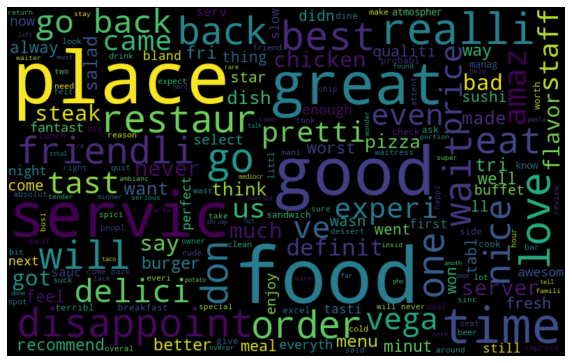

In [8]:
from wordcloud import WordCloud

all_words = ' '.join([text for text in corpus])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Creating the Bag of Words model

+ Bag-of-Words is a method to represent a document as a vector with dimension N where N is the number of possible words.
+ The entry corrosponding for a specific word in the vector given by the bag-of-words representation indicates the count of how many times the word is in the text of the document.
+ It has drawback or is little ineffecient as it assigns/gives equal importance to all words present.

In [9]:
# Converting data to sparse matrix for analysis
cv = CountVectorizer()

X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

In [10]:
# Dictionary - it includes all the unique words in the corpus alphabetically
print(cv.get_feature_names())

['about', 'above', 'absolut', 'absolutley', 'accid', 'accommod', 'accomod', 'accordingli', 'account', 'ach', 'acknowledg', 'across', 'actual', 'ad', 'afford', 'after', 'afternoon', 'again', 'ago', 'ahead', 'airlin', 'airport', 'ala', 'albondiga', 'all', 'allergi', 'almond', 'almost', 'alon', 'also', 'although', 'alway', 'am', 'amaz', 'ambianc', 'ambienc', 'amount', 'ampl', 'an', 'and', 'andddd', 'angri', 'annoy', 'anoth', 'anticip', 'any', 'anymor', 'anyon', 'anyth', 'anytim', 'anyway', 'apart', 'apolog', 'app', 'appal', 'appar', 'appeal', 'appet', 'appetit', 'appl', 'approv', 'are', 'area', 'aren', 'arepa', 'aria', 'around', 'array', 'arriv', 'articl', 'as', 'ask', 'assur', 'at', 'ate', 'atmospher', 'atroci', 'attach', 'attack', 'attent', 'attitud', 'auju', 'authent', 'averag', 'avocado', 'avoid', 'aw', 'away', 'awesom', 'awkward', 'awkwardli', 'ayc', 'az', 'baba', 'babi', 'bachi', 'back', 'bacon', 'bad', 'bagel', 'bakeri', 'baklava', 'ball', 'bamboo', 'banana', 'bank', 'bar', 'bare',

In [11]:
# total number of unique words
len(cv.get_feature_names())

1688

In [12]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
# 'X' basically includes the number of occurences of a word in a sentence
pd.DataFrame(data=X, index=['Sentence'+str(i) for i in range(df.shape[0])], columns=cv.get_feature_names())

,about,above,absolut,absolutley,accid,accommod,accomod,accordingli,account,ach,...,yelper,yet,you,your,yourself,yucki,yukon,yum,yummi,zero
Sentence0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sentence1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sentence2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sentence3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sentence4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sentence995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sentence996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sentence997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sentence998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
cv.get_feature_names().index('love')

862

In [15]:
# results '1' since love occured once in first sentence
X[0][862]

1

### Splitting into training & test sets

In [16]:
# from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### Logistic Regression

In [17]:
# from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(solver='saga', n_jobs=-1, multi_class='auto', max_iter=200)
classifier1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_pred1 = classifier1.predict(X_test)
y_pred1

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1], dtype=int64)

In [19]:
y_test

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0], dtype=int64)

In [20]:
# from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred1)

array([[79, 21],
       [16, 84]], dtype=int64)

In [21]:
# from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)    # classifier1.score(X_test, y_test)

0.815

In [22]:
# from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       100
           1       0.80      0.84      0.82       100

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



In [23]:
# from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier1, X = X_train, y = y_train, cv = 10, n_jobs=-1)
print(accuracies.mean(), accuracies.std())

0.8 0.029580398915498095


### Naive Bayes

In [24]:
# from sklearn.naive_bayes import MultinomialNB
classifier2 = MultinomialNB()
classifier2.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:
y_pred2 = classifier2.predict(X_test)
y_pred2

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0], dtype=int64)

In [26]:
y_test

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0], dtype=int64)

In [27]:
# from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred2)

array([[72, 28],
       [20, 80]], dtype=int64)

In [28]:
# from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)    # classifier2.score(X_test, y_test)

0.76

In [29]:
# from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       100
           1       0.74      0.80      0.77       100

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



In [30]:
# from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier2, X = X_train, y = y_train, cv = 10, n_jobs=-1)
print(accuracies.mean(), accuracies.std())

0.80375 0.05215661511256264


# Some Key Concepts

## Tokenization Process

In [31]:
# Consider a paragraph
a = 'NLP stands for Natural Language Processing. It is a subfield of linguistics, computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process & analyze large amounts of natural language data.'
print(a)

NLP stands for Natural Language Processing. It is a subfield of linguistics, computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process & analyze large amounts of natural language data.


In [32]:
# Splitting paragraph into list of sentences
from nltk.tokenize import sent_tokenize
sent_tokenize(a)

['NLP stands for Natural Language Processing.',
 'It is a subfield of linguistics, computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process & analyze large amounts of natural language data.']

In [33]:
# Splitting text into diff. words & some punctuations
from nltk.tokenize import word_tokenize
word_tokenize(a)

['NLP',
 'stands',
 'for',
 'Natural',
 'Language',
 'Processing',
 '.',
 'It',
 'is',
 'a',
 'subfield',
 'of',
 'linguistics',
 ',',
 'computer',
 'science',
 ',',
 'information',
 'engineering',
 ',',
 'and',
 'artificial',
 'intelligence',
 'concerned',
 'with',
 'the',
 'interactions',
 'between',
 'computers',
 'and',
 'human',
 '(',
 'natural',
 ')',
 'languages',
 ',',
 'in',
 'particular',
 'how',
 'to',
 'program',
 'computers',
 'to',
 'process',
 '&',
 'analyze',
 'large',
 'amounts',
 'of',
 'natural',
 'language',
 'data',
 '.']

## Part-Of-Speech (POS) Tag

+ List of POS-tags & their meanings- 
https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [34]:
nltk.pos_tag(word_tokenize('Machine Learning is great!'))

[('Machine', 'NN'),
 ('Learning', 'NNP'),
 ('is', 'VBZ'),
 ('great', 'JJ'),
 ('!', '.')]

## Lemmatization

+ It is a process of grouping diff. inflected forms of a word together so they can be analysed as a single item.
+ Lemmatization is similar to stemming but it brings context to the words or the root word is meaningful.
+ One major diff. with stemming is that lemmatize takes a part of speech parameter, “pos” (default is “noun”).

In [35]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print("rocks : ", lemmatizer.lemmatize("rocks"), " : ", nltk.pos_tag(["rocks"])) 
print("corpora : ", lemmatizer.lemmatize("corpora"), " : ", nltk.pos_tag(["corpora"])) 
print("better : ", lemmatizer.lemmatize("better"), " : ", nltk.pos_tag(["better"]))
# a denotes adjective in "pos" 
print("better : ", lemmatizer.lemmatize("better", pos ="a"), " : ", nltk.pos_tag(["better"]))

rocks :  rock  :  [('rocks', 'NNS')]
corpora :  corpus  :  [('corpora', 'NNS')]
better :  better  :  [('better', 'RBR')]
better :  good  :  [('better', 'RBR')]


## TF-IDF Vectorizer Model

+ TF-IDF stands for 'Term Frequency – Inverse Document Frequency'.
+ TF-IDF is similar to bag-of-words but TF-IDF overcomes weakness of bag-of-words. Both methods represent a document as vector with dimension N where N is the number of possible words.
+ For a vector given by TF-IDF the entry indicates a weight depending on both how many times the word occurs in the document, and how rare it appears in other documents.

+ TF(w) = (Number of times term w appears in a document) / (Total number of terms in the document)
+ IDF(w) = log(Total number of documents / Number of documents with term w in it)
+ TF-IDF(w) = TF(w)*IDF(w)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

# corpus is the collection of pre-processed sentences
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()

In [37]:
# TF-IDF feature matrix
tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
# 'tfidf' basically includes the weights of a word in a sentence
index_data = ['Sentence'+str(i) for i in range(df.shape[0])]
columns_data = tfidf_vectorizer.get_feature_names()
pd.DataFrame(data=tfidf, index=index_data, columns=columns_data)

,about,above,absolut,absolutley,accid,accommod,accomod,accordingli,account,ach,...,yelper,yet,you,your,yourself,yucki,yukon,yum,yummi,zero
Sentence0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sentence1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sentence2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sentence3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sentence4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sentence995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sentence996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sentence997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sentence998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
tfidf_vectorizer.get_feature_names().index('love')

862

In [40]:
# represents weight of word 'love' in first sentence
tfidf[0][862]

0.48657099908439444

## Krippendorff Alpha

+ Krippendorff Alpha is commonly used in content analysis to quantify the extent of agreement between raters, it differs from most other measures of inter-rater reliability (It is a score of how much homogeneity or consensus exists in the ratings given by various judges) because it calculates disagreement (as opposed to agreement).
+ Alpha range from 0 to 1, where 0 is perfect disagreement and 1 is perfect agreement.
+ Krippendorff suggests: “It is customary to require α ≥ .800. Where tentative conclusions are still acceptable, α ≥ .667 is the lowest conceivable limit.

In [41]:
# Considering CountVectorizer result matrix
import krippendorff
krippendorff.alpha(X)

0.0783107834472142

## Named Entity Recognition (NER)

+ It is a information extraction technique to identify & segment the named entities under various predefined classes.

In [42]:
from nltk import ne_chunk

txt1 = "The US President stays in the WHITE HOUSE"
txt1_tokens = word_tokenize(txt1)
txt1_tags = nltk.pos_tag(txt1_tokens)
txt1_ner = ne_chunk(txt1_tags)
print(txt1_ner)

txt2 = "Google's CEO Sundar Pichai introduced the new Pixel at Minnesota Roi Centre Event"
txt2_tokens = word_tokenize(txt2)
txt2_tags = nltk.pos_tag(txt2_tokens)
txt2_ner = ne_chunk(txt2_tags)
print(txt2_ner)
# txt2_ner.draw()    # tree representation

(S
  The/DT
  (ORGANIZATION US/NNP)
  President/NNP
  stays/VBZ
  in/IN
  the/DT
  (FACILITY WHITE/NNP HOUSE/NNP))
(S
  (GPE Google/NNP)
  's/POS
  (ORGANIZATION CEO/NNP Sundar/NNP Pichai/NNP)
  introduced/VBD
  the/DT
  new/JJ
  Pixel/NNP
  at/IN
  (ORGANIZATION Minnesota/NNP Roi/NNP Centre/NNP)
  Event/NNP)


## Topic Modeling

+ Topic Modeling automatically discover the hidden themes from given documents.
+ It is an unsupervised text analytics algorithm that is used for finding the group of words from the given document. These group of words represents a topic.

### Latent Semantic Analysis (LSA)

+ **Synonymy** - multiple words with the same meanings
+ **Polysemy** - one word with multiple meanings

+ First, TF-IDF is not a method for compressing vector dimension.
+ Now, given a bunch of M documents, you can put them together into a matrix with dimension M x N (Each document is a row with N dimension represented by either bag-of-words or TF-IDF). This matrix C is called **document-term matrix**.
+ LSA is a technique that uses SVD as a mathematical tool to find a low-rank  matrix that approximates the given document-term matrix such that the dimension of the new  matrix are  (M x K)  and (k<N).  Each row represented a document (with dimension K). This approximated representation can capture relationship between words that might have not been present in the original document-term matrix.

#### Using Sklearn SVD

In [43]:
# Considering tf-idf result matrix
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
lsa = svd.fit_transform(tfidf)
pd.DataFrame(data=lsa, index=index_data, columns=['topic1', 'topic2'])

,topic1,topic2
Sentence0,0.137572,0.189457
Sentence1,0.193881,0.033630
Sentence2,0.241535,-0.060236
Sentence3,0.120538,0.014953
Sentence4,0.418439,-0.202815
...,...,...
Sentence995,0.190703,-0.058406
Sentence996,0.001549,0.004092
Sentence997,0.261428,0.237573
Sentence998,0.234244,0.086703


In [44]:
# Encoding Matrix (Used to gain an understanding of the topics latent to the body)
encoding = pd.DataFrame(data=svd.components_, index=['topic1', 'topic2'], columns=tfidf_vectorizer.get_feature_names()).T
encoding

,topic1,topic2
about,0.025002,0.027454
above,0.005078,-0.001814
absolut,0.015084,0.003216
absolutley,0.001021,-0.000543
accid,0.002363,0.005729
...,...,...
yucki,0.001394,0.000585
yukon,0.000524,-0.000379
yum,0.001200,-0.000653
yummi,0.007277,0.001386


#### Using Gensim - LSI

In [45]:
data = [i.split() for i in corpus]
data

[['wow', 'love', 'this', 'place'],
 ['crust', 'is', 'not', 'good'],
 ['not', 'tasti', 'and', 'the', 'textur', 'was', 'just', 'nasti'],
 ['stop',
  'by',
  'during',
  'the',
  'late',
  'may',
  'bank',
  'holiday',
  'off',
  'rick',
  'steve',
  'recommend',
  'and',
  'love',
  'it'],
 ['the',
  'select',
  'on',
  'the',
  'menu',
  'was',
  'great',
  'and',
  'so',
  'were',
  'the',
  'price'],
 ['now', 'i', 'am', 'get', 'angri', 'and', 'i', 'want', 'my', 'damn', 'pho'],
 ['honeslti', 'it', 'didn', 't', 'tast', 'that', 'fresh'],
 ['the',
  'potato',
  'were',
  'like',
  'rubber',
  'and',
  'you',
  'could',
  'tell',
  'they',
  'had',
  'been',
  'made',
  'up',
  'ahead',
  'of',
  'time',
  'being',
  'kept',
  'under',
  'a',
  'warmer'],
 ['the', 'fri', 'were', 'great', 'too'],
 ['a', 'great', 'touch'],
 ['servic', 'was', 'very', 'prompt'],
 ['would', 'not', 'go', 'back'],
 ['the',
  'cashier',
  'had',
  'no',
  'care',
  'what',
  'so',
  'ever',
  'on',
  'what',
  'i'

In [46]:
from gensim import corpora
dictn = corpora.Dictionary(data)
print(dictn)

Dictionary(1694 unique tokens: ['love', 'place', 'this', 'wow', 'crust']...)


In [47]:
[i for i in dictn.iteritems()]

[(0, 'love'),
 (1, 'place'),
 (2, 'this'),
 (3, 'wow'),
 (4, 'crust'),
 (5, 'good'),
 (6, 'is'),
 (7, 'not'),
 (8, 'and'),
 (9, 'just'),
 (10, 'nasti'),
 (11, 'tasti'),
 (12, 'textur'),
 (13, 'the'),
 (14, 'was'),
 (15, 'bank'),
 (16, 'by'),
 (17, 'during'),
 (18, 'holiday'),
 (19, 'it'),
 (20, 'late'),
 (21, 'may'),
 (22, 'off'),
 (23, 'recommend'),
 (24, 'rick'),
 (25, 'steve'),
 (26, 'stop'),
 (27, 'great'),
 (28, 'menu'),
 (29, 'on'),
 (30, 'price'),
 (31, 'select'),
 (32, 'so'),
 (33, 'were'),
 (34, 'am'),
 (35, 'angri'),
 (36, 'damn'),
 (37, 'get'),
 (38, 'i'),
 (39, 'my'),
 (40, 'now'),
 (41, 'pho'),
 (42, 'want'),
 (43, 'didn'),
 (44, 'fresh'),
 (45, 'honeslti'),
 (46, 't'),
 (47, 'tast'),
 (48, 'that'),
 (49, 'a'),
 (50, 'ahead'),
 (51, 'been'),
 (52, 'being'),
 (53, 'could'),
 (54, 'had'),
 (55, 'kept'),
 (56, 'like'),
 (57, 'made'),
 (58, 'of'),
 (59, 'potato'),
 (60, 'rubber'),
 (61, 'tell'),
 (62, 'they'),
 (63, 'time'),
 (64, 'under'),
 (65, 'up'),
 (66, 'warmer'),
 (67, 

In [48]:
crps = [dictn.doc2bow(item) for item in data]
crps

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1)],
 [(7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)],
 [(0, 1),
  (8, 1),
  (13, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1)],
 [(8, 1),
  (13, 3),
  (14, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1)],
 [(8, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 2),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1)],
 [(19, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1)],
 [(8, 1),
  (13, 1),
  (33, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1)],
 [(13, 1), (27, 1), (33, 1), (68, 1), (69, 1)],
 [(27, 1), (49, 1), (70, 1)],
 [(14, 1), (71, 1), (72, 1), (73, 1)],
 [(7, 1), (74, 1), (75, 1), (76, 1)],
 [(13, 1),


In [49]:
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel

model_base = []
coherence = []
for i in range(1,10):
    lsamodel = LsiModel(corpus=crps, num_topics=i, id2word=dictn)
    model_base.append(lsamodel)
    
    coherencemodel = CoherenceModel(model=lsamodel, texts=data, dictionary=dictn, coherence='c_v')
    coherence.append(coherencemodel.get_coherence())

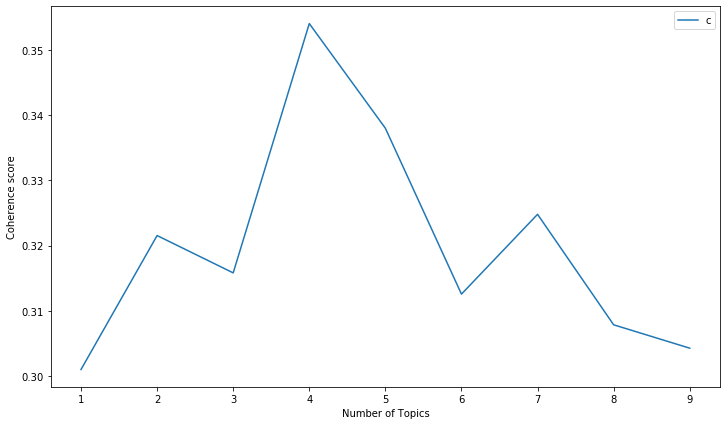

In [50]:
x = range(1, 10)
plt.plot(x, coherence)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

+ Of the number of topics, the highest coherence score is the optimum number of topics.

In [51]:
model_id = coherence.index(max(coherence))
print('Number of topics: ',model_id+1)
print(model_base[model_id].print_topics(num_topics=model_id+1, num_words=10))

Number of topics:  4
[(0, '0.622*"the" + 0.389*"and" + 0.307*"i" + 0.269*"was" + 0.209*"to" + 0.191*"a" + 0.128*"is" + 0.123*"of" + 0.119*"it" + 0.104*"food"'), (1, '0.575*"i" + -0.517*"the" + 0.294*"to" + 0.252*"a" + 0.187*"this" + -0.179*"was" + 0.152*"place" + 0.147*"it" + 0.106*"t" + 0.104*"be"'), (2, '0.670*"and" + -0.443*"the" + 0.384*"a" + -0.300*"i" + 0.120*"was" + -0.105*"to" + 0.076*"our" + -0.071*"t" + 0.071*"great" + 0.062*"servic"'), (3, '0.468*"i" + 0.456*"was" + -0.379*"is" + -0.361*"a" + -0.294*"to" + 0.170*"and" + -0.154*"for" + -0.152*"place" + -0.147*"this" + -0.141*"the"')]


+ Above result consist of list of tuples, each containing corresponding topic attributes!

### Latent Dirichlet Allocation (LDA)

+ LDA is a generative probabilistic model, that assumes a Dirichlet prior over the latent topics.
+ LDA provides better accuracy than LSA/LSI but is comparatively slower.

+ p(topic t | document d) => the proportion of words in document d that are currently assigned to topic t.
+ p(word w | topic t) => the proportion of assignments to topic t over all documents that come from this word w
+ p(topic t | document d) * p(word w | topic t) => the probability that topic t generated word w

#### Using Sklearn LDA

In [52]:
# Considering tf-idf result matrix
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=7, n_jobs=-1)
LDA.fit(tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=7, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [53]:
print('TF-IDF Matrix: ', tfidf.shape)
print('LDA Components: ', LDA.components_.shape)

TF-IDF Matrix:  (1000, 1688)
LDA Components:  (7, 1688)


In [54]:
topics = ['topic'+str(i) for i in range(LDA.components_.shape[0])]
pd.DataFrame(data=LDA.components_, index=topics, columns=tfidf_vectorizer.get_feature_names())

,about,above,absolut,absolutley,accid,accommod,accomod,accordingli,account,ach,...,yelper,yet,you,your,yourself,yucki,yukon,yum,yummi,zero
topic0,0.413789,0.477502,2.108943,0.142858,0.613880,0.142857,0.142858,0.142858,0.142858,0.142858,...,0.142858,0.142858,2.046242,1.602220,0.840661,0.470761,0.142857,0.142858,0.963942,0.142857
topic1,2.448220,0.487697,0.143057,0.142858,0.142857,0.142857,0.142857,0.142858,0.596594,0.142857,...,0.487466,0.144222,3.838598,3.412237,0.142858,0.142857,0.142857,0.142857,0.393230,0.142857
topic2,0.611186,0.142858,0.647886,0.142858,0.142857,0.468905,0.142857,0.142858,0.142858,0.142858,...,0.142857,0.142858,0.667945,0.322445,0.142858,0.142857,0.142857,0.142857,0.142858,0.142857
topic3,0.343112,0.142858,0.638849,0.142858,0.142857,0.142858,0.142858,0.142858,0.142858,0.142858,...,0.142858,0.496758,0.144636,0.142860,0.142858,0.142857,0.471986,0.142858,0.142858,0.142857
topic4,0.142892,0.142858,0.359300,0.142858,0.142857,0.142857,0.142857,0.142858,0.142857,0.543639,...,0.142857,0.142858,1.865783,0.318522,0.142858,0.142857,0.142857,0.142858,0.142858,1.814857
topic5,1.128734,0.142858,0.451876,0.142858,0.142857,0.142857,0.142857,0.713784,0.142857,0.142857,...,0.142857,0.578799,5.506054,1.463687,0.417707,0.142857,0.142857,0.535137,0.495075,0.142857
topic6,0.821472,0.142858,0.142859,0.885301,0.142857,0.142857,0.551426,0.142858,0.142858,0.142858,...,0.142858,0.142858,1.575068,0.720741,0.142858,0.142857,0.142857,0.142858,0.142858,0.142857


In [55]:
for i, topic in enumerate(LDA.components_):
    print(f"Top 15 Words for Topic {i}:")
    print([tfidf_vectorizer.get_feature_names()[index] for index in topic.argsort()[-15:]])
    print("\n")

Top 15 Words for Topic 0:
['don', 'be', 'in', 'recommend', 'all', 'servic', 'not', 'to', 'and', 'amaz', 'would', 'was', 'place', 'the', 'this']


Top 15 Words for Topic 1:
['food', 'it', 'time', 'we', 'here', 'to', 'go', 'again', 'and', 'was', 'be', 'the', 'not', 'back', 'will']


Top 15 Words for Topic 2:
['for', 'has', 'here', 'servic', 'food', 'of', 'they', 'we', 'have', 'is', 'very', 'was', 'had', 'and', 'the']


Top 15 Words for Topic 3:
['though', 'place', 'burger', 'to', 'select', 'beer', 'are', 'price', 'food', 'nice', 'is', 'was', 'and', 'the', 'good']


Top 15 Words for Topic 4:
['but', 'delici', 'of', 'good', 'servic', 'to', 'restaur', 'is', 'like', 'not', 'food', 'and', 'it', 'was', 'the']


Top 15 Words for Topic 5:
['that', 'of', 'was', 'servic', 'friendli', 'for', 'very', 'you', 'are', 'to', 'this', 'place', 'and', 'is', 'the']


Top 15 Words for Topic 6:
['food', 'be', 'back', 'to', 'very', 'so', 'servic', 'terribl', 'it', 'disappoint', 'won', 'and', 'great', 'the', 'wa

In [56]:
res = LDA.transform(tfidf)
res.shape

(1000, 7)

In [57]:
pd.DataFrame(data=res, index=index_data, columns=topics)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6
Sentence0,0.704071,0.049286,0.049314,0.049269,0.049344,0.049405,0.049310
Sentence1,0.050058,0.050179,0.050012,0.699620,0.050118,0.050048,0.049965
Sentence2,0.040130,0.040161,0.040073,0.040153,0.759368,0.040089,0.040026
Sentence3,0.030715,0.030601,0.816056,0.030608,0.030665,0.030706,0.030650
Sentence4,0.035374,0.035384,0.035371,0.036005,0.035467,0.786824,0.035575
...,...,...,...,...,...,...,...
Sentence995,0.035107,0.035189,0.035102,0.789091,0.035150,0.035171,0.035189
Sentence996,0.052326,0.052326,0.052326,0.686044,0.052326,0.052326,0.052326
Sentence997,0.039199,0.039372,0.038932,0.038910,0.765459,0.038991,0.039137
Sentence998,0.818023,0.030434,0.030557,0.030105,0.030162,0.030257,0.030461


In [58]:
pd.DataFrame(data=['topic'+str(list(i).index(max(i))) for i in res], index=index_data, columns=['Most Appropriate Topic'])

,Most Appropriate Topic
Sentence0,topic0
Sentence1,topic3
Sentence2,topic4
Sentence3,topic2
Sentence4,topic5
...,...
Sentence995,topic3
Sentence996,topic3
Sentence997,topic4
Sentence998,topic0


In [59]:
# pyLDAvis => Python library for interactive topic model visualization.

from pyLDAvis import sklearn as sklearn_lda
import pickle
import pyLDAvis
import os

pyLDAvis.enable_notebook()
LDAvis_prepared = sklearn_lda.prepare(LDA, np.matrix(tfidf), tfidf_vectorizer)
LDAvis_prepared

e:\rohit\python\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.031460  0.002176       1        1  16.747397
1      0.084028  0.028936       2        1  16.280029
4     -0.004057 -0.010093       3        1  16.192573
2     -0.005697 -0.026383       4        1  14.491080
6      0.024139 -0.065246       5        1  13.425789
0     -0.001861  0.057202       6        1  11.933132
3     -0.065093  0.013408       7        1  10.930000, topic_info=     Category       Freq     Term      Total  loglift  logprob
1644  Default   8.000000     will   8.000000  30.0000  30.0000
96    Default  12.000000     back  12.000000  29.0000  29.0000
1653  Default   5.000000      won   5.000000  28.0000  28.0000
1458  Default   4.000000  terribl   4.000000  27.0000  27.0000
118   Default  12.000000       be  12.000000  26.0000  26.0000
...       ...        ...      ...        ...      ...      ...
989    Topic7   1.327617      not  16.861679  -0.3280  -5.4592
575    Topic7   1.202464      for  13.329593  -0.1920  -5.5582
781    Topic7   1.264038       it  19.301899  -0.5122  -5.5083
1294   Topic7   1.186093   servic  16.321776  -0.4082  -5.5719
1474   Topic7   1.100860     they   8.807725   0.1341  -5.6465

[465 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         1  0.265864       about
0         2  0.531727       about
0         5  0.265864       about
2         6  0.361828     absolut
3         5  0.925623  absolutley
...     ...       ...         ...
1680      6  0.100205         you
1681      1  0.197042        your
1681      2  0.394083        your
1681      6  0.197042        your
1687      3  0.588544        zero

[676 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 5, 3, 7, 1, 4])

#### Using Gensim - LDA

+ Implemented same as LSA above!

In [60]:
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

model_base2 = []
coherence2 = []
for i in range(1,10):
    ldamodel = LdaModel(corpus=crps, num_topics=i, id2word=dictn)
    model_base2.append(ldamodel)
    
    coherencemodel2 = CoherenceModel(model=ldamodel, texts=data, dictionary=dictn, coherence='c_v')
    coherence2.append(coherencemodel2.get_coherence())

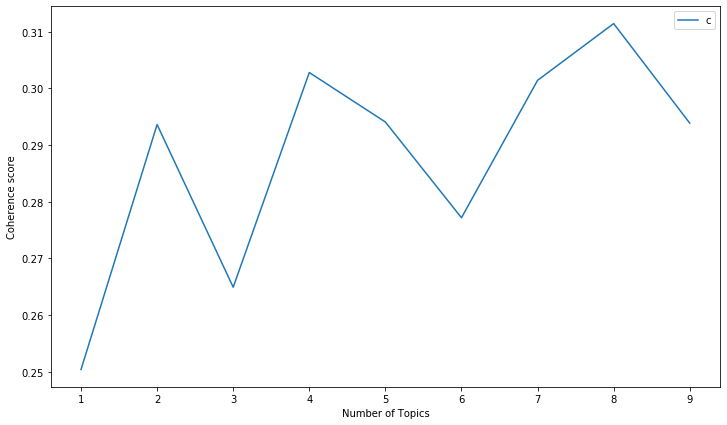

In [61]:
x = range(1, 10)
plt.plot(x, coherence2)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [62]:
model_id2 = coherence2.index(max(coherence2))
print('Number of topics: ',model_id2+1)
print(model_base2[model_id2].print_topics(num_topics=model_id2+1, num_words=10))

Number of topics:  8
[(0, '0.046*"i" + 0.042*"and" + 0.028*"a" + 0.022*"the" + 0.020*"is" + 0.013*"this" + 0.012*"be" + 0.012*"great" + 0.011*"was" + 0.011*"to"'), (1, '0.093*"the" + 0.038*"and" + 0.029*"is" + 0.021*"was" + 0.017*"servic" + 0.016*"i" + 0.016*"food" + 0.015*"to" + 0.011*"good" + 0.010*"in"'), (2, '0.052*"the" + 0.034*"a" + 0.029*"and" + 0.026*"was" + 0.023*"of" + 0.014*"i" + 0.014*"this" + 0.014*"we" + 0.012*"had" + 0.011*"food"'), (3, '0.027*"was" + 0.023*"the" + 0.020*"i" + 0.019*"and" + 0.016*"we" + 0.016*"very" + 0.014*"food" + 0.014*"a" + 0.013*"back" + 0.012*"it"'), (4, '0.045*"the" + 0.036*"was" + 0.034*"i" + 0.020*"and" + 0.019*"to" + 0.018*"in" + 0.018*"a" + 0.017*"it" + 0.014*"not" + 0.010*"of"'), (5, '0.032*"this" + 0.031*"i" + 0.029*"the" + 0.026*"place" + 0.026*"was" + 0.026*"a" + 0.024*"to" + 0.019*"it" + 0.016*"is" + 0.015*"and"'), (6, '0.046*"and" + 0.042*"the" + 0.030*"was" + 0.027*"i" + 0.020*"to" + 0.018*"it" + 0.016*"for" + 0.015*"a" + 0.014*"t" + 0.

## Word2Vec

+ Both Bag-of-Words & TF-IDF used to lack semantic relations between words.
+ Word2Vec is used to overcome this & returns some astonishing results.
+ Word2Vec approach uses deep learning and neural networks-based techniques to convert words into corresponding vectors in such a way that the semantically similar vectors are close to each other in N-dimensional space, where N refers to the dimensions of the vector.

In [63]:
from gensim.models import Word2Vec

# Training the Word2Vec model
model = Word2Vec([i.split() for i in corpus], min_count=1)

In [64]:
# words
model.wv.vocab

{'wow': <gensim.models.keyedvectors.Vocab at 0x1920491ec10>,
 'love': <gensim.models.keyedvectors.Vocab at 0x192048026d0>,
 'this': <gensim.models.keyedvectors.Vocab at 0x19204802430>,
 'place': <gensim.models.keyedvectors.Vocab at 0x192048024f0>,
 'crust': <gensim.models.keyedvectors.Vocab at 0x192048027f0>,
 'is': <gensim.models.keyedvectors.Vocab at 0x19204802850>,
 'not': <gensim.models.keyedvectors.Vocab at 0x19204436310>,
 'good': <gensim.models.keyedvectors.Vocab at 0x192044362b0>,
 'tasti': <gensim.models.keyedvectors.Vocab at 0x19204436e20>,
 'and': <gensim.models.keyedvectors.Vocab at 0x192044366a0>,
 'the': <gensim.models.keyedvectors.Vocab at 0x19204436a30>,
 'textur': <gensim.models.keyedvectors.Vocab at 0x19204436730>,
 'was': <gensim.models.keyedvectors.Vocab at 0x19204436f10>,
 'just': <gensim.models.keyedvectors.Vocab at 0x192044369d0>,
 'nasti': <gensim.models.keyedvectors.Vocab at 0x19204436a90>,
 'stop': <gensim.models.keyedvectors.Vocab at 0x19204436ca0>,
 'by': <g

In [65]:
# Finding Word Vectors
vector = model.wv['love']
vector

array([ 0.00057999,  0.052082  , -0.13783331, -0.05836446,  0.04121603,
       -0.04624691, -0.00841711, -0.01704981,  0.04392631,  0.00425735,
       -0.00060348, -0.06528837, -0.01610337, -0.07761534, -0.02841552,
       -0.09929948, -0.01967268,  0.04806897, -0.04940233,  0.0227847 ,
        0.01912276,  0.06476638, -0.04613724, -0.0524575 ,  0.00446141,
        0.15584753,  0.02500887, -0.03349017,  0.04247867,  0.02579759,
        0.04522835, -0.05267259, -0.02058254,  0.0339381 , -0.10578772,
        0.06723356, -0.02369713, -0.0715489 ,  0.14776789, -0.02358205,
       -0.00156622, -0.05549406,  0.04903824,  0.03178024,  0.01350293,
        0.05949715, -0.01199847,  0.06004041, -0.03992494, -0.09054828,
       -0.01091271, -0.02485266,  0.04725637,  0.07379252,  0.00803272,
       -0.06160687,  0.01972134,  0.00852848,  0.05505932,  0.0424753 ,
       -0.02772292,  0.03071021,  0.00707689,  0.08948805, -0.09332999,
       -0.11209049, -0.02064499, -0.10351378,  0.00280914, -0.07

In [66]:
vector.shape

(100,)

In [67]:
# Most similar words
model.wv.most_similar('love')

[('and', 0.9989301562309265),
 ('it', 0.9988880753517151),
 ('the', 0.9988700747489929),
 ('a', 0.9988151788711548),
 ('i', 0.9987908601760864),
 ('we', 0.9987881183624268),
 ('to', 0.998751163482666),
 ('was', 0.9987380504608154),
 ('that', 0.9987208843231201),
 ('is', 0.9987180829048157)]

In [68]:
# similarity between two vectors
model.wv.similarity(w1='love', w2='good')

0.9984443

## FastText

+ fastText is a library for efficient learning of word representations & sentence classification by FaceBook.
+ fastText is known for providing faster results/outputs.
+ Here, fastText is implemented using Gensim library but can also be implemented directly using fastText library.
+ fastText provides results for words which were not in training set whereas Word2Vec throws error.

In [69]:
from gensim.models import FastText

# Training fastText model
fasttext_model = FastText([i.split() for i in corpus], size=10, window=5, min_count=5)

In [70]:
fasttext_model.wv.most_similar('India')

[('avoid', 0.07160547375679016),
 ('larg', 0.041330620646476746),
 ('do', 0.03644043207168579),
 ('rude', 0.0323929488658905),
 ('don', 0.0323101282119751),
 ('arriv', 0.030967414379119873),
 ('far', 0.028582125902175903),
 ('sick', 0.027471035718917847),
 ('mouth', 0.026589468121528625),
 ('hard', 0.02619166672229767)]